In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [37]:
data = pd.read_csv('large_simplified_ckd_dataset.csv')

In [38]:
data.columns

Index(['Age years', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class', 'Gender', 'Weight', 'Height', 'BMI',
       'GFR', 'CKD_Stage'],
      dtype='object')

# Select features and target

In [49]:

features = ['Age years', 'Weight', 'Height', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'GFR']
target = 'CKD_Stage'

X = data[features]
y = data[target]

# Split the data

In [50]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Train the model

In [51]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

# Print classification report

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       190
           3       1.00      1.00      1.00       211
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       208

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



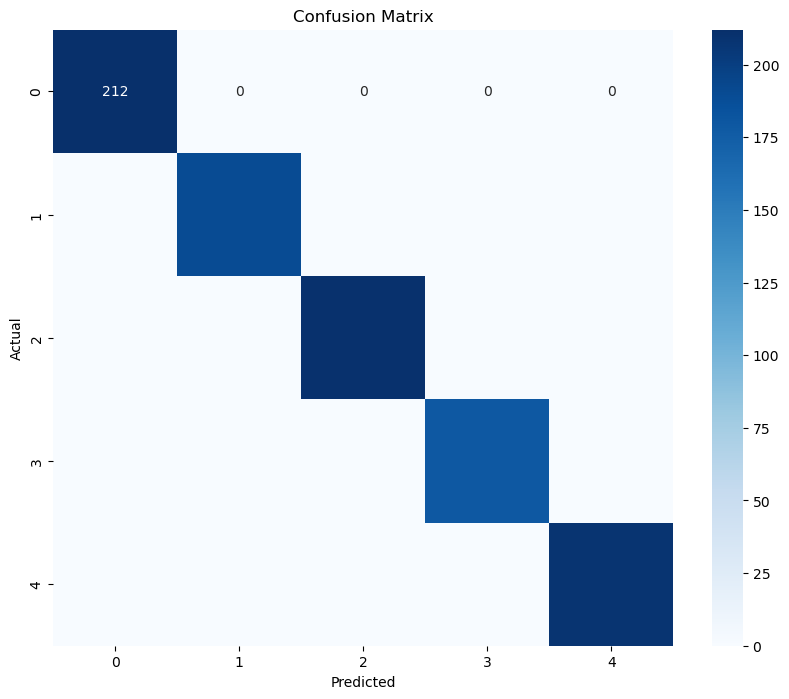

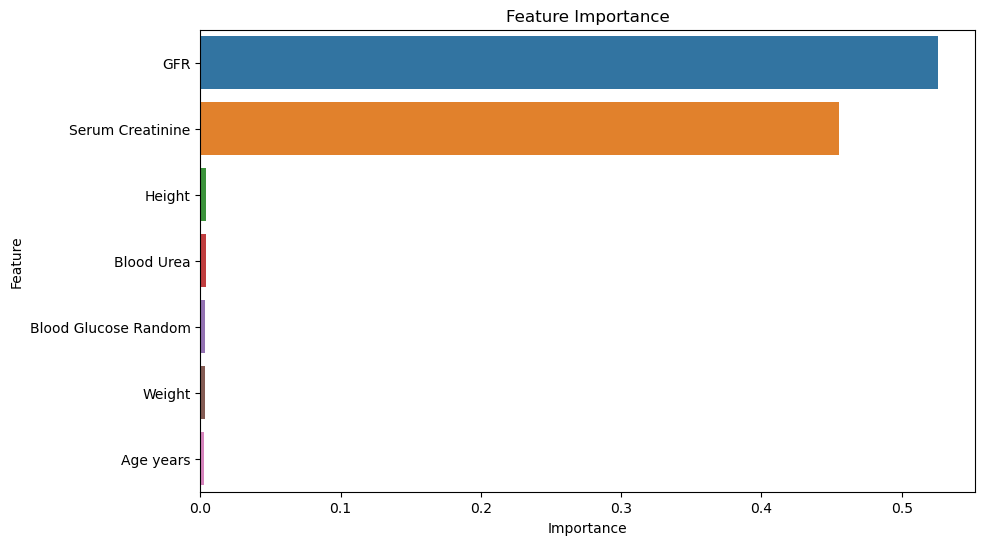

In [52]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Evaluate the model

In [54]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Function to predict kidney disease stage
def predict_kidney_stage(age, weight, height, glucose, ceratine, urea, gfr):
    input_data = np.array([[age, weight, height, glucose,ceratine,  urea, gfr]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    print('The stage is stage')
    return prediction[0]

# Example usage
#stage 2
print(predict_kidney_stage(50, 70, 170, 100, 30, 20, 80))
#stage 5
print(predict_kidney_stage(10, 10, 140, 100, 40, 20, 10))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       190
           3       1.00      1.00      1.00       211
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       208

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[212   0   0   0   0]
 [  0 190   0   0   0]
 [  0   0 211   0   0]
 [  0   0   0 179   0]
 [  0   0   0   0 208]]
The stage is stage
3
The stage is stage
5


C:\Users\Fatima\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Fatima\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Save as pick